Mean: 322.966749, Standard Deviation: 245.88533510097207


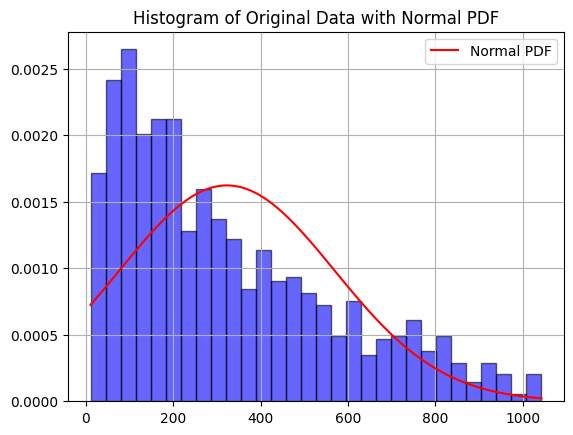

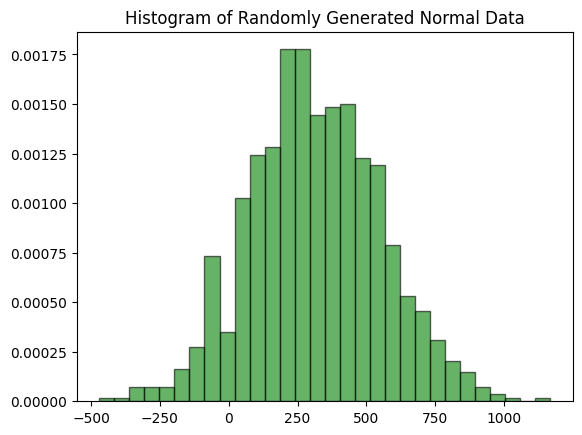

P(X < 322.966749) = 0.5
95th Percentile: 727.412134255012


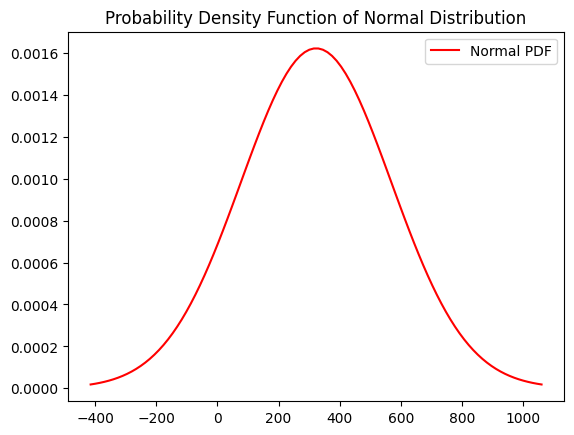

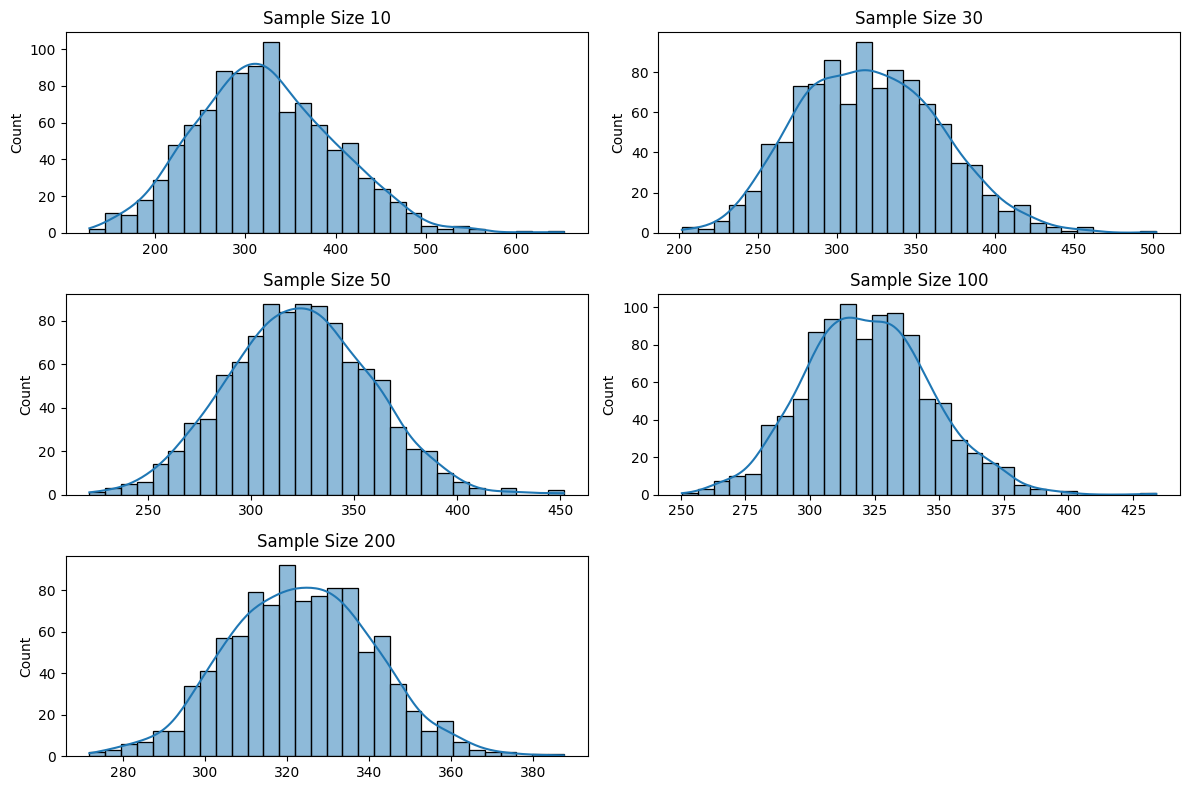

Original Data - Skewness: 0.8912303920037631, Kurtosis: -0.08746991289329031
Sample Size 10 - Skewness: 0.25909630526806865, Kurtosis: 0.1287288047849966
Sample Size 30 - Skewness: 0.2654246103331005, Kurtosis: 0.33209412827813756
Sample Size 50 - Skewness: 0.09128866959923927, Kurtosis: 0.08746497476817172
Sample Size 100 - Skewness: 0.1296440039460098, Kurtosis: 0.13785117474061837
Sample Size 200 - Skewness: 0.05027718091677289, Kurtosis: 0.05189759892155266
99th Percentile Value: 894.981575569966


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis

# Load dataset
data = pd.read_csv('/content/supermarket_sales -.csv')

# Select a highly skewed numerical column (e.g., 'Total')
numeric_column = 'Total'

# Drop NaN values if any
data = data.dropna(subset=[numeric_column])

# Compute Summary Statistics
mean_val = data[numeric_column].mean()
std_val = data[numeric_column].std()
print(f"Mean: {mean_val}, Standard Deviation: {std_val}")

# Plot histogram of original data
data[numeric_column].hist(bins=30, density=True, alpha=0.6, color='b', edgecolor='black')

# Overlay normal distribution curve
x = np.linspace(data[numeric_column].min(), data[numeric_column].max(), 100)
plt.plot(x, norm.pdf(x, mean_val, std_val), 'r-', label='Normal PDF')
plt.title('Histogram of Original Data with Normal PDF')
plt.legend()
plt.show()

# Generate 1000 random samples from normal distribution
random_samples = np.random.normal(mean_val, std_val, 1000)
plt.hist(random_samples, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Histogram of Randomly Generated Normal Data')
plt.show()

# Cumulative Probability (CDF)
threshold = mean_val
probability = norm.cdf(threshold, mean_val, std_val)
print(f"P(X < {threshold}) = {probability}")

# Quantiles (95th percentile)
p95 = norm.ppf(0.95, mean_val, std_val)
print(f"95th Percentile: {p95}")

# Density Function (PDF plot)
x_values = np.linspace(mean_val - 3*std_val, mean_val + 3*std_val, 100)
y_values = norm.pdf(x_values, mean_val, std_val)
plt.plot(x_values, y_values, 'r-', label='Normal PDF')
plt.title('Probability Density Function of Normal Distribution')
plt.legend()
plt.show()

# Verifying CLT
sample_sizes = [10, 30, 50, 100, 200]
plt.figure(figsize=(12, 8))
for i, size in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.choice(data[numeric_column], size, replace=True)) for _ in range(1000)]
    plt.subplot(3, 2, i+1)
    sns.histplot(sample_means, bins=30, kde=True)
    plt.title(f'Sample Size {size}')
plt.tight_layout()
plt.show()

# Skewness and Kurtosis
original_skew = skew(data[numeric_column])
original_kurt = kurtosis(data[numeric_column])
print(f"Original Data - Skewness: {original_skew}, Kurtosis: {original_kurt}")

for size in sample_sizes:
    sample_means = [np.mean(np.random.choice(data[numeric_column], size, replace=True)) for _ in range(1000)]
    print(f"Sample Size {size} - Skewness: {skew(sample_means)}, Kurtosis: {kurtosis(sample_means)}")

# Compute the z-score corresponding to the 99th percentile
z_score_99 = norm.ppf(0.99, mean_val, std_val)
print(f"99th Percentile Value: {z_score_99}")
